In [1]:
from kmeans import *
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

import warnings

In [2]:
# cette option permet d'ignorer les avertissements (pour une meilleure visualisation) 
warnings.filterwarnings('ignore')

## Récupération des données du dataset Iris
    Séparation des variables : Sélection des features et de la target
    Mélange des données pour éviter les biais de sélection des données
    

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
names = iris.target_names
X, y = shuffle(X, y)

## Application de la fonction K-means de Sklearn au dataset Iris
    3 clusters (k=3)

In [4]:
kmeans = KMeans(n_clusters=3)

In [5]:
iris_kmeans = kmeans.fit(X)

In [6]:
conf_matrix = confusion_matrix(y, iris_kmeans.labels_)

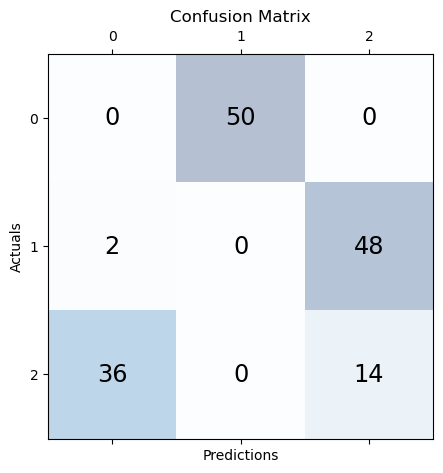

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

### Visualisation du clustering
    Comparatif: Predictions / Valeurs actuelles

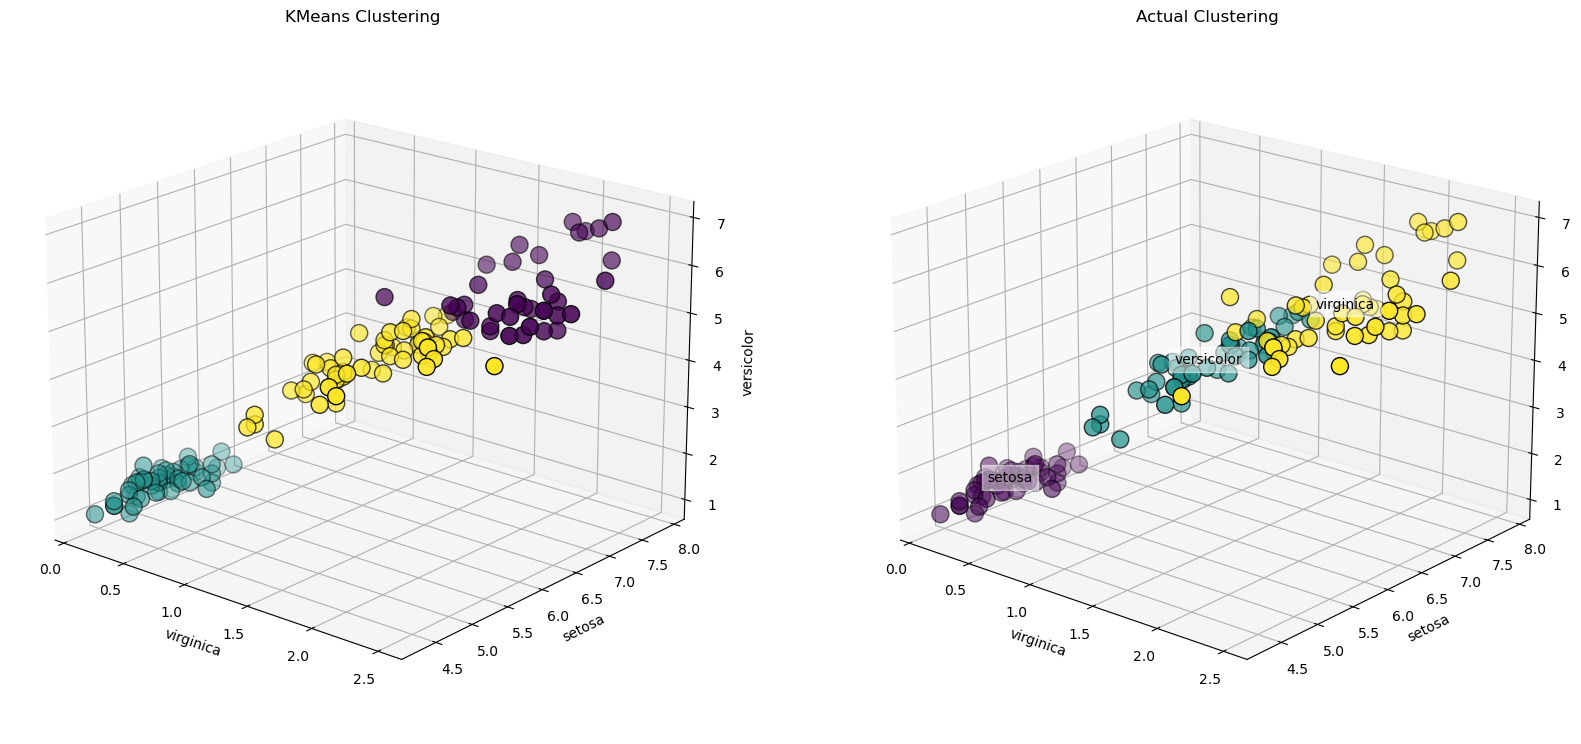

In [8]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], c=iris_kmeans.labels_.astype(float), edgecolor='k', s=150, cmap='viridis')
ax1.view_init(20, -50)
ax1.set_xlabel(names[2])
ax1.set_ylabel(names[0])
ax1.set_zlabel(names[1])
ax1.set_title('KMeans Clustering')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for label, name in enumerate(names):
    ax2.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean(),
        name,
        horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w')
    )

ax2.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k', s=150, cmap='viridis')
ax2.view_init(20, -50)
ax2.set_xlabel(names[2])
ax2.set_ylabel(names[0])
ax2.set_zlabel(names[1])
ax2.set_title('Actual Clustering')
plt.show()

## Application de mon algo au dataset Iris

In [9]:
df = pd.DataFrame(X)

- ### k = 2

In [10]:
my2Means = MyKMeans(2, df)

In [11]:
iris_2means, centroids_2 = my2Means.fit()

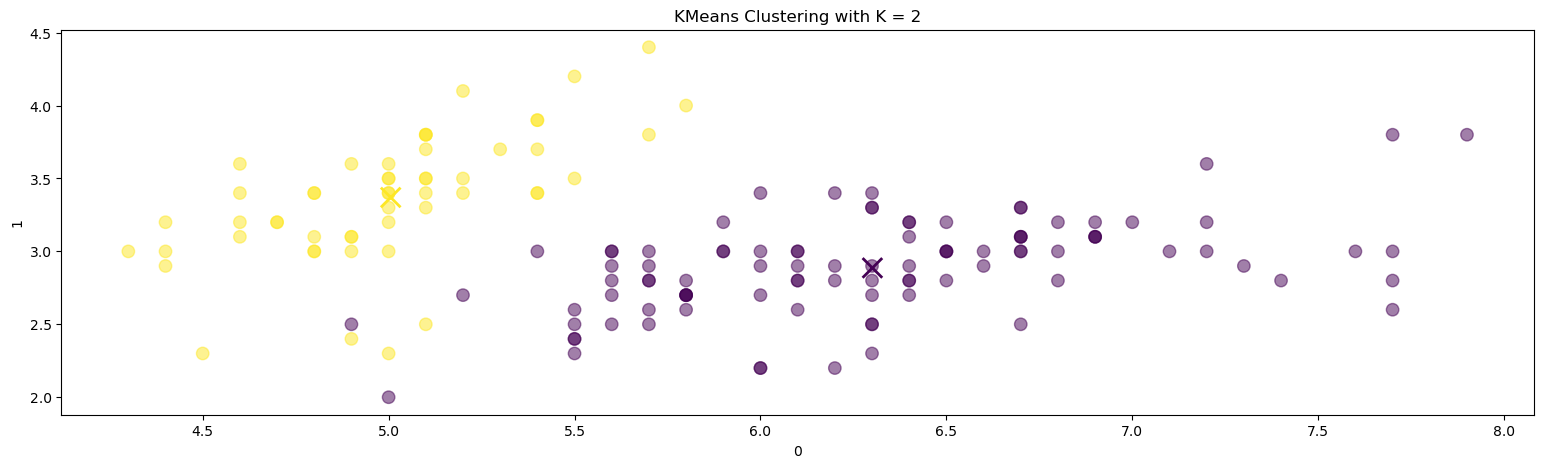

In [12]:
my2Means.plot(iris_2means, centroids_2)

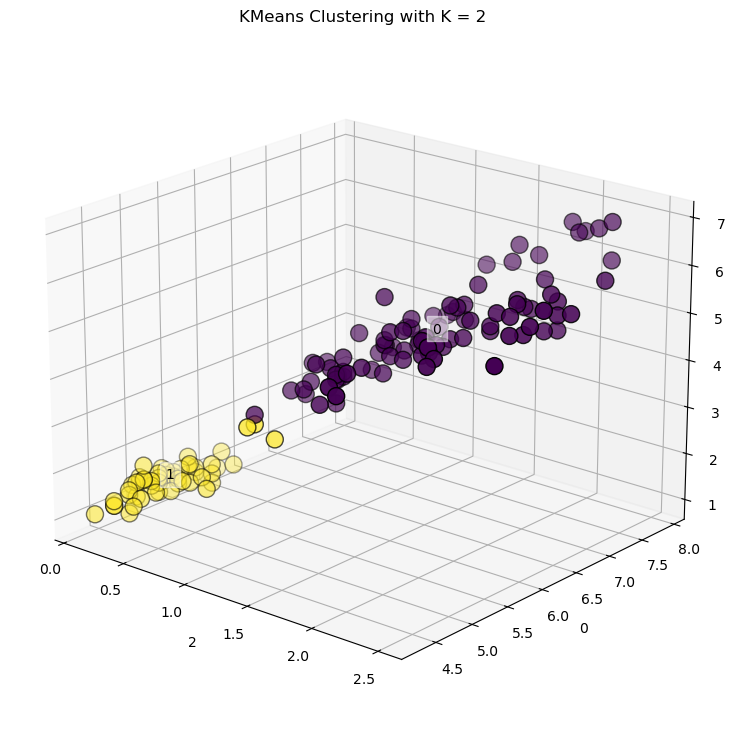

In [13]:
my2Means.plot_3D(iris_2means)

- ### k = 3

In [14]:
my3Means = MyKMeans(3, df)

In [15]:
iris_3means, centroids_3 = my3Means.fit()

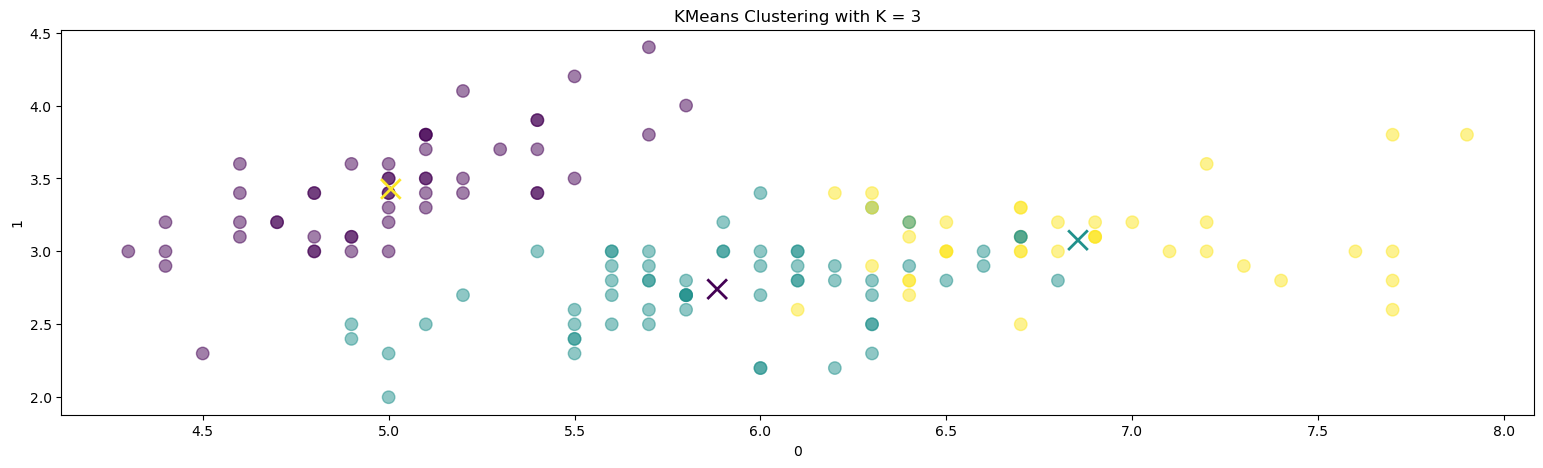

In [16]:
my3Means.plot(iris_3means, centroids_3)

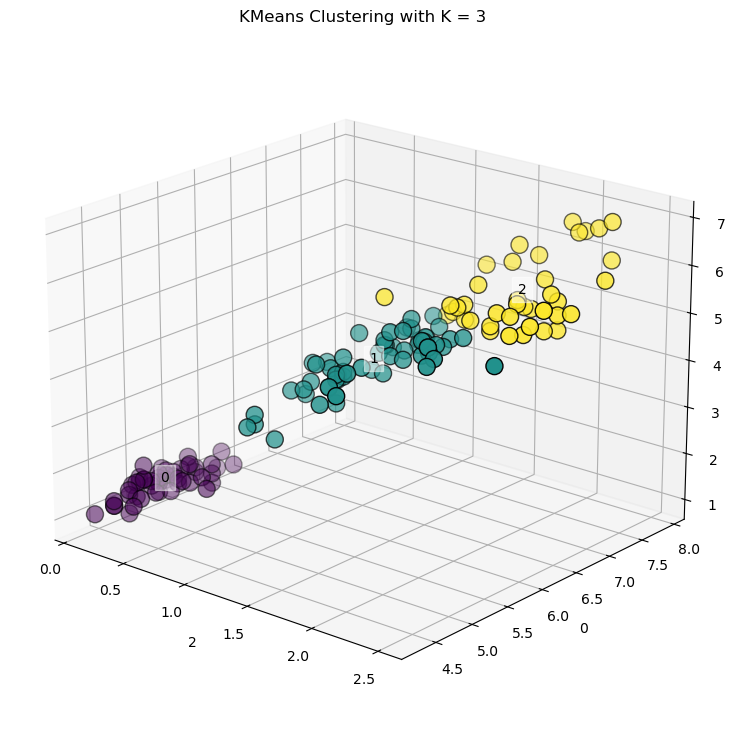

In [17]:
my3Means.plot_3D(iris_3means)

- ### k = 5

In [18]:
my5Means = MyKMeans(5, df)

In [19]:
iris_5means, centroids_5 = my5Means.fit()

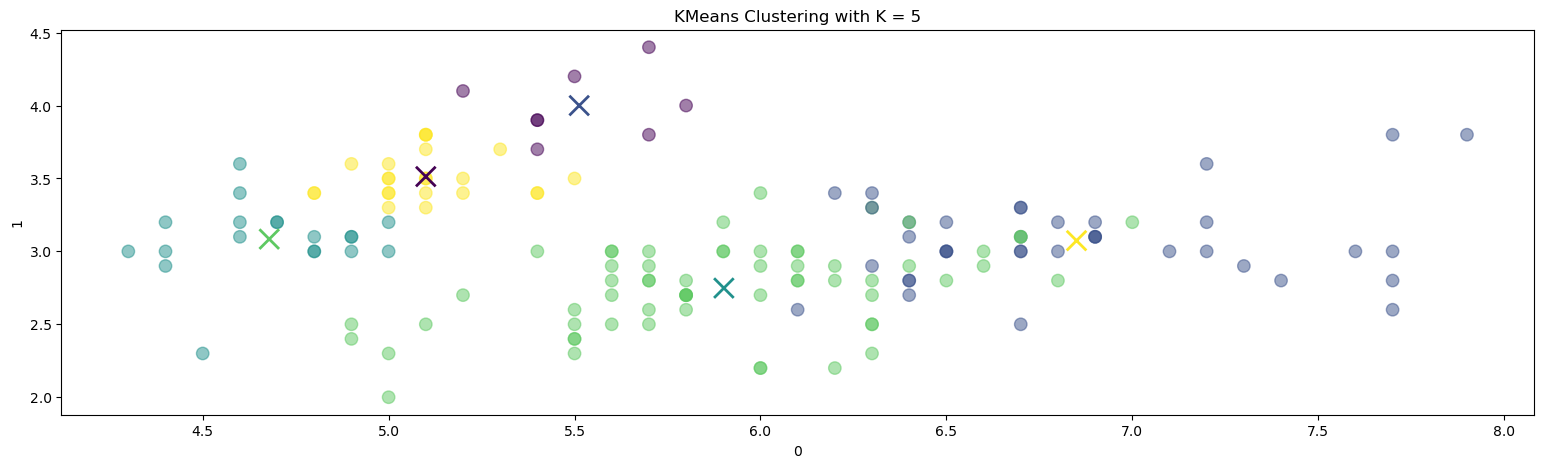

In [20]:
my5Means.plot(iris_5means, centroids_5)

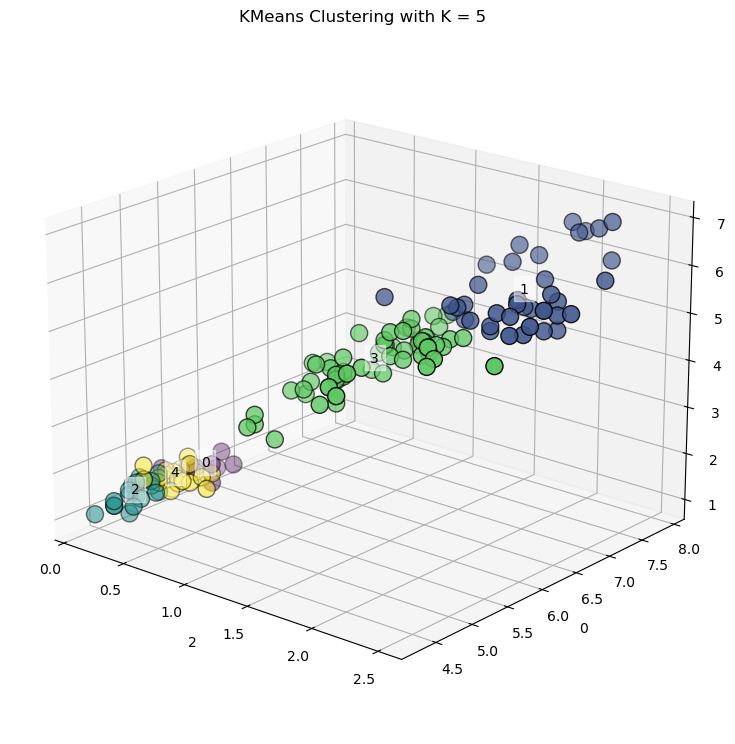

In [21]:
my5Means.plot_3D(iris_5means)

- ### k = 10

In [22]:
my10Means = MyKMeans(10, df)

In [23]:
iris_10means, centroids_10 = my10Means.fit()

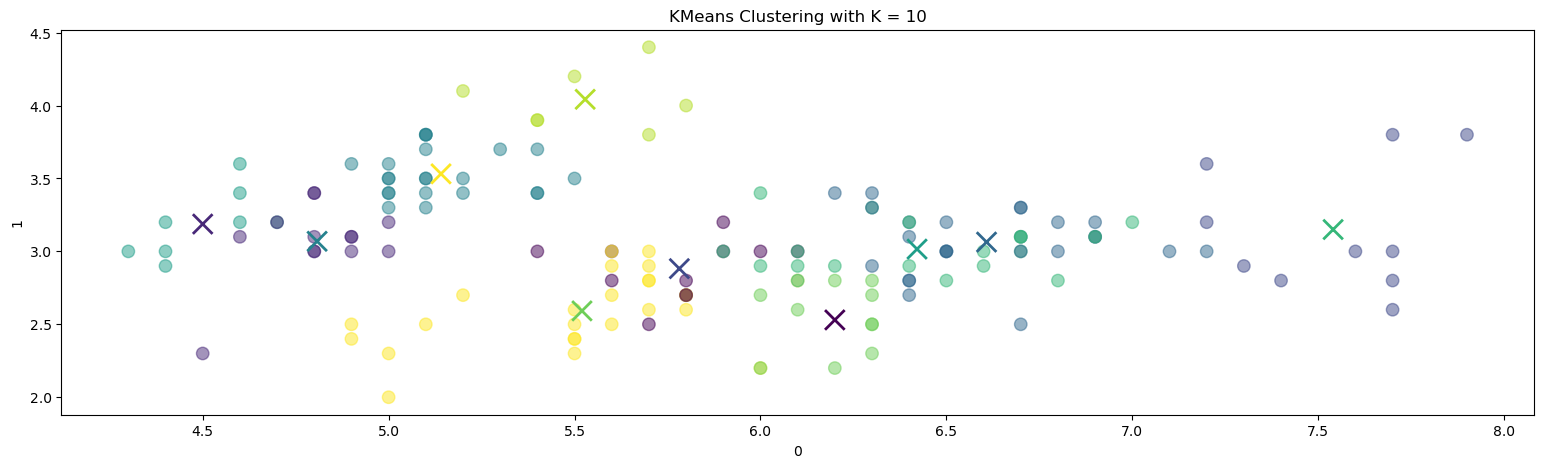

In [24]:
my10Means.plot(iris_10means, centroids_10)

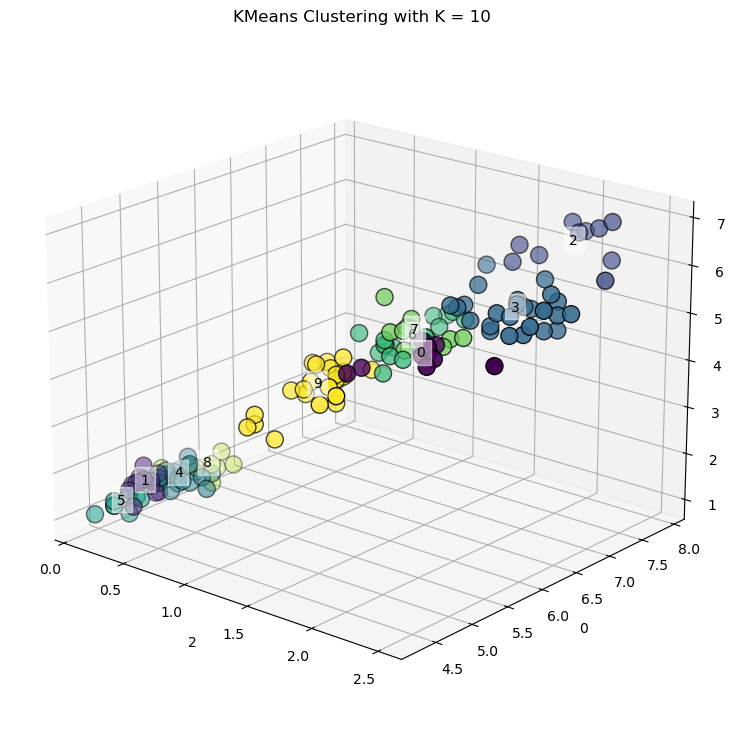

In [25]:
my10Means.plot_3D(iris_10means)

## Observation : 
    Comparaison en fonction de la valeur 'error' (valeur de distance entre les points et les centroides des clusters)

In [26]:
centroids_2

,0,1,2,3,error
0,6.301031,2.886598,4.958763,1.695876,3.434715
1,5.005660,3.369811,1.560377,0.290566,1.233702


In [27]:
centroids_3

,0,1,2,3,error
0,5.006000,3.428000,1.462000,0.246000,0.205793
1,5.883607,2.740984,4.388525,1.434426,0.712179
2,6.853846,3.076923,5.715385,2.053846,0.790907


In [28]:
centroids_5

,0,1,2,3,error
0,5.512500,4.000000,1.475000,0.275000,0.016748
1,6.850000,3.073684,5.742105,2.071053,0.736347
2,4.678947,3.084211,1.378947,0.200000,0.041317
3,5.901613,2.748387,4.393548,1.433871,0.750226
4,5.100000,3.513043,1.526087,0.273913,0.012763


In [29]:
centroids_10

,0,1,2,3,error
0,5.781818,2.881818,4.890909,1.854545,0.046442
1,4.807692,3.069231,1.500000,0.200000,0.050647
2,7.540000,3.150000,6.390000,2.090000,0.168753
3,6.608000,3.064000,5.552000,2.128000,0.075813
4,5.140909,3.531818,1.504545,0.277273,0.009962
5,4.500000,3.187500,1.275000,0.200000,0.012702
6,6.421053,3.015789,4.584211,1.442105,0.049553
7,6.200000,2.530000,4.930000,1.580000,0.060505
8,5.528571,4.042857,1.471429,0.285714,0.016168
9,5.520000,2.592000,3.908000,1.196000,0.199343


In [30]:
mods = [
    my2Means,
    my3Means,
    my5Means,
    my10Means
    ]

clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for mod in mods:
        
    # predicted = mod.fit()
    clusters = mod.k
    clf_compare.loc[row_index,'Clusters'] = clusters
    clf_compare.loc[row_index,'Total error'] = mod.total_error
    
    row_index+=1
    
clf_compare.sort_values(by = ['Total error'], ascending = False, inplace = True)    
clf_compare

,Clusters,Total error
0,2.0,398.553506
1,3.0,84.577942
2,5.0,75.707752
3,10.0,11.716216


### On remarque alors que : plus le nombre de clusters augmente, plus le total d'erreur diminue.
### On observe une nette déclinaison du total d'erreur en fonction de l'incrémentation de clusters.